In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import utils

In [2]:
# using linspace(start, stop, num) to generate the values in X equally distributed between 0 and 20
# num is 50 (default)
X = np.linspace(0, 20)
y = -1*X + 2

In [46]:
def Adam(x,y,alpha,beta1, beta2):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    theta_0 = 0
    theta_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    
    vt_0 = 0
    mt_0 = 0
    vt_1 = 0
    mt_1 = 0
    epsilon = 10**-8
    
    #x,y = utils.shuffle(x,y)
    
    #8. Repeat from 2 to 6 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
        hx = theta_0 + (theta_1 * x)

        #3. Calculate Cost function 𝑱(theta_0,theta_1 )
        j = (np.sum(hx - y)**2)/(2*len(x))

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        js.append(j)

        #4. Calculate the gradient
        g_theta_0 = np.sum(hx-y)/len(x)
        g_theta_1 = np.sum((hx-y) * x)/len(x)
        
        #5. calculate the accumulated gradient square
        mt_0 = beta1*mt_0 + (1-beta1)*g_theta_0
        vt_0 = beta2*vt_0 + (1-beta2)*g_theta_0**2
        mt_1 = beta1*mt_1 + (1-beta1)*g_theta_1
        vt_1 = beta2*vt_1 + (1-beta2)*g_theta_1**2
        
        mt_0_hat = mt_0 / (1-(beta1**(i+1)))
        mt_1_hat = mt_1 / (1-(beta1**(i+1)))
        
        vt_0_hat = vt_0 / (1-(beta2**(i+1)))
        vt_1_hat = vt_1 / (1-(beta2**(i+1)))
        
        #6. Update the parameters (simultaneously)
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0_hat) + epsilon) * mt_0_hat)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1_hat) + epsilon) * mt_1_hat)
        
        #7. Stop condition
        #thetas_vactor_prev = np.array([thetas_0[-1], thetas_1[-1]])
        #thetas_vector_curr = np.array([theta_0, theta_1])
        if i>1 and abs(js[i-2] - js[i-1]) < 0.001: #and (np.linalg.norm(thetas_vactor_prev) - np.linalg.norm(thetas_vector_curr)) < 0.0001:
            break;
        
    return i, thetas_0, thetas_1, js

In [53]:
i, thetas_0, thetas_1, js = Adam(X,y,0.1,0.5,0.7)

In [54]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 798 times
and the min cost is 0.6604169449591434


In [55]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 798 iterations')

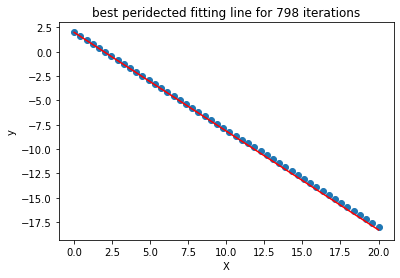

In [56]:
plt.scatter(X,y)
plt.plot(X, yhat, color ='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

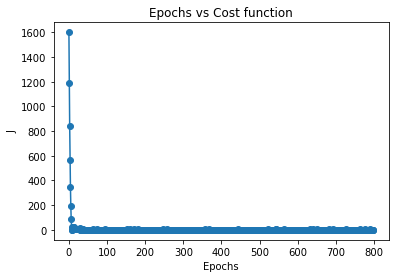

In [57]:
plt.plot(np.arange(i+1), js,'-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

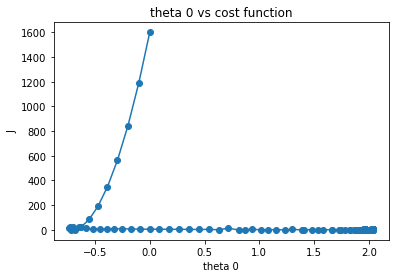

In [58]:
# theta 0
plt.plot(thetas_0,js,'-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

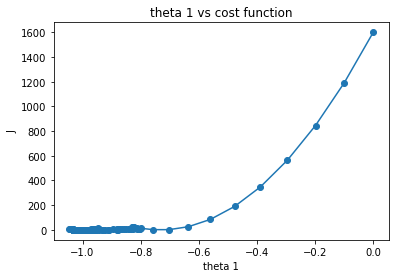

In [59]:
# theta 1
plt.plot(thetas_1,js,'-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [60]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%
